In [6]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=9354ec08d40eed3494b70251a8b07faa05c0646c2ae41fb5d38fc32bf8a6895a
  Stored in directory: /Users/kadri/Library/Caches/pip/wheels/f3/6d/ba/d999da6dff3d5cc6735e9855579fa236bf7c5bdbb210a873b8
Successfully built sklearn


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn import cluster

In [9]:
df = pd.read_csv('./cheese.txt', sep='\t')
# Ou encore
df = df.set_index('Fromages')
df.sort_values('cholesterol')
df

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [10]:
## Stats desc
# Unidimensionnelle

df.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


<AxesSubplot:>

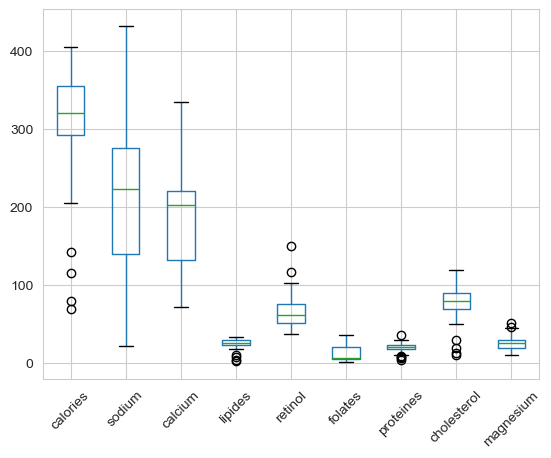

In [11]:
# df.plot.
df.boxplot(rot=45)

In [12]:
corr = df.corr()
corr

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.000000,0.447224,0.433400,0.983634,-0.042885,-0.321098,0.885372,0.961923,0.745443
sodium,0.447224,1.000000,0.005959,0.483344,0.144328,0.136561,0.275998,0.332994,0.031113
calcium,0.433400,0.005959,1.000000,0.341132,-0.289547,-0.637503,0.610705,0.428446,0.710480
lipides,0.983634,0.483344,0.341132,1.000000,-0.018353,-0.276543,0.809303,0.955444,0.689860
retinol,-0.042885,0.144328,-0.289547,-0.018353,1.000000,0.517266,-0.039173,-0.086972,-0.099801
folates,-0.321098,0.136561,-0.637503,-0.276543,0.517266,1.000000,-0.352871,-0.366346,-0.447067
proteines,0.885372,0.275998,0.610705,0.809303,-0.039173,-0.352871,1.000000,0.817138,0.787777
cholesterol,0.961923,0.332994,0.428446,0.955444,-0.086972,-0.366346,0.817138,1.000000,0.752453
magnesium,0.745443,0.031113,0.710480,0.689860,-0.099801,-0.447067,0.787777,0.752453,1.000000


In [13]:
# HeatMap : 
# https://stackoverflow.com/questions/39409866/correlation-heatmap

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/var/folders/f1/jvzhrs0d00gg34f_f6mn0l7h0000gn/T/ipykernel_20259/3748490656.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.00,0.45,0.43,0.98,-0.04,-0.32,0.89,0.96,0.75
sodium,0.45,1.00,0.01,0.48,0.14,0.14,0.28,0.33,0.03
calcium,0.43,0.01,1.00,0.34,-0.29,-0.64,0.61,0.43,0.71
lipides,0.98,0.48,0.34,1.00,-0.02,-0.28,0.81,0.96,0.69
retinol,-0.04,0.14,-0.29,-0.02,1.00,0.52,-0.04,-0.09,-0.10
folates,-0.32,0.14,-0.64,-0.28,0.52,1.00,-0.35,-0.37,-0.45
proteines,0.89,0.28,0.61,0.81,-0.04,-0.35,1.00,0.82,0.79
cholesterol,0.96,0.33,0.43,0.96,-0.09,-0.37,0.82,1.00,0.75
magnesium,0.75,0.03,0.71,0.69,-0.10,-0.45,0.79,0.75,1.00


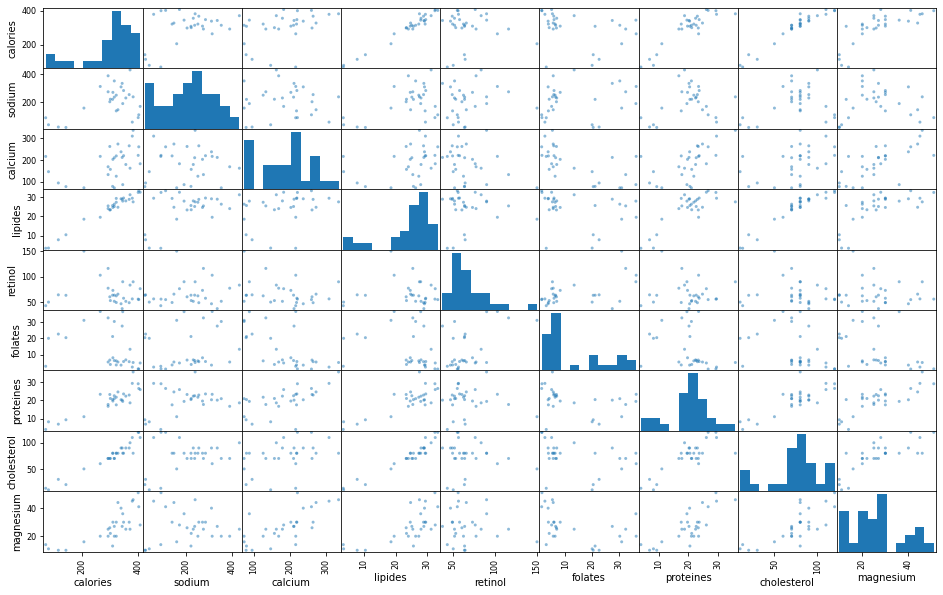

In [13]:
# bidimensionnelle
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df, figsize = (16,10))

<AxesSubplot:>

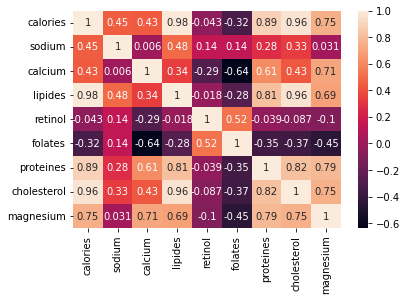

In [15]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,0.726190,0.808537,0.000000,0.765886,0.127866,0.826705,0.534810,0.545455,0.243902
Babybel,0.726190,0.526829,0.523664,0.725753,0.234568,0.147727,0.585443,0.545455,0.414634
Beaufort,0.985119,0.219512,0.712977,1.000000,0.156966,0.000000,0.712025,1.000000,0.756098
Bleu,0.809524,0.765854,0.528626,0.852843,0.000000,0.747159,0.509494,0.727273,0.414634
Camembert,0.577381,0.712195,0.546947,0.538462,0.581129,1.000000,0.610759,0.454545,0.243902
Cantal,0.883929,0.570732,0.730534,0.849498,0.103175,0.127841,0.598101,0.727273,0.487805
Chabichou,0.815476,0.414634,0.055725,0.819398,0.467372,0.997159,0.487342,0.636364,0.634146
Chaource,0.660714,0.619512,0.230153,0.735786,0.699295,0.889205,0.433544,0.545455,0.365854
Cheddar,1.000000,0.365854,0.418702,0.973244,0.346561,0.105114,0.693038,0.909091,0.439024


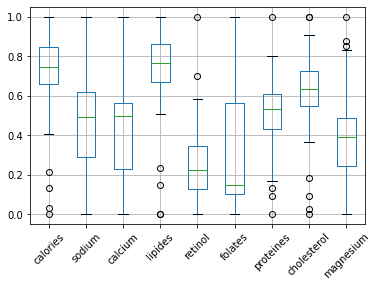

In [25]:
# from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max
min_max.fit(df)
min_max.data_min_
min_max.data_max_
min_max.transform(df)
pd.DataFrame(min_max.transform(df), columns=df.columns, index=df.index).boxplot(rot = 45)
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns, index=df.index)
df_minmax

# df_scale = scale(df)
# df_scale
# pd.DataFrame(df_scale, columns = df.columns, index=df.index).describe()


In [13]:
df.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


In [34]:
pd.DataFrame(df_minmax, columns=df.columns, index=df.index).describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,cl_orig
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.684626,0.458747,0.431811,0.694268,0.268625,0.335521,0.508512,0.587147,0.413793,0.517241
std,0.273555,0.265071,0.276828,0.271894,0.213078,0.333049,0.220246,0.256780,0.276058,0.413907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.660714,0.287805,0.230153,0.668896,0.127866,0.105114,0.433544,0.545455,0.243902,0.000000
50%,0.747024,0.490244,0.495038,0.765886,0.222222,0.147727,0.534810,0.636364,0.390244,0.333333
75%,0.848214,0.619512,0.564504,0.859532,0.346561,0.565341,0.610759,0.727273,0.487805,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

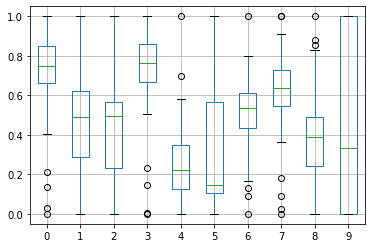

In [35]:
pd.DataFrame(df_minmax).boxplot()

<AxesSubplot:>

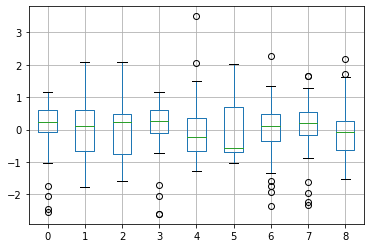

In [22]:
pd.DataFrame(df).boxplot()

In [26]:
# Kmeans sur le df_minmax
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=4, random_state=42)

In [33]:
kmeans_minmax.n_iter_ 
# kmeans_minmax.labels_
# [0, 1, 3, 1, 0, 1, 0, 0, 1, 3, 0, 3, 3, 0, 1, 2, 2, 1, 1, 3, 2, 1,
#        1, 1, 1, 1, 1, 1, 2]

3

In [8]:
kmeans_minmax.inertia_, kmeans_orig.inertia_

NameError: name 'kmeans_minmax' is not defined

In [32]:
# Kmeans sur le df d'origine
kmeans_orig = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_orig.fit(df)
var = kmeans_orig.labels_
kmeans_orig.n_iter_

5

In [38]:
df['cl_minmax']=kmeans_minmax.labels_
df.sort_values('cl_minmax')
# df['cl_orig']=kmeans_orig.labels_
# df.sort_values('cl_orig')
# df

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,cl_minmax
Fromages,,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20,0
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20,0
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36,0
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25,0
Coulomniers,308,222.0,79.2,25.6,63.6,21.1,20.5,80,13,0
Fr.chevrepatemolle,206,160.0,72.8,18.5,150.5,31.0,11.1,50,16,0
Tome,321,252.0,125.5,27.3,62.3,6.2,21.8,80,20,1
SaintPaulin,298,205.0,261.0,23.3,60.4,6.7,23.3,70,26,1
Rocquefort,370,432.0,162.0,31.2,83.5,13.3,18.7,100,25,1


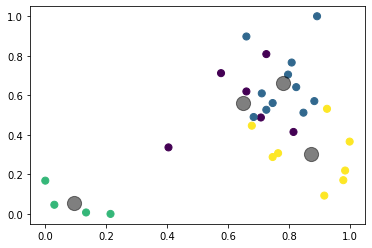

In [49]:
# y_kmeans = kmeans_minmax.predict(df_minmax)
# y_kmeans
# centers = kmeans_minmax.cluster_centers_
# centers
# plt.figure()
plt.scatter(df_minmax[ : , 0], df_minmax[ : , 1], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [51]:
# matrice des distance
# pd.DataFrame(kmeans_minmax.transform(df_minmax))
# Inertie
kmeans_minmax.inertia_

6.226382720718949

*** For n_clusters = 2, inertia is 10.459237045898448 ***

*** For n_clusters = 3, inertia is 6.725377741461454 ***

*** For n_clusters = 4, inertia is 4.789529981536394 ***

*** For n_clusters = 5, inertia is 4.057345689962401 ***

*** For n_clusters = 6, inertia is 3.5859413623113 ***

*** For n_clusters = 7, inertia is 3.2007493664443207 ***

*** For n_clusters = 8, inertia is 2.842629247437265 ***

*** For n_clusters = 9, inertia is 2.5034220055804206 ***

*** For n_clusters = 10, inertia is 2.113238459390238 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

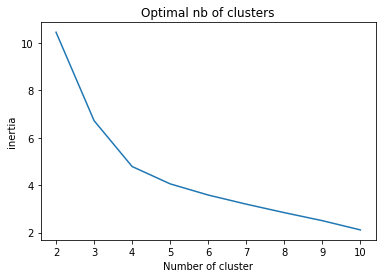

In [39]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(df_minmax)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

*** For n_clusters=2, The Silhouette Coefficient is 0.4690528318105175 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.40607153264596557 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.359408100156797 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.33386962582799495 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.3220910332267876 ***

*** For n_clusters=7, The Silhouette Coefficient is 0.2684615294380563 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.2501632393875038 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.20951844414204615 ***

*** For n_clusters=10, The Silhouette Coefficient is 0.2153000216240999 ***

[0.4690528318105175, 0.40607153264596557, 0.359408100156797, 0.33386962582799495, 0.3220910332267876, 0.2684615294380563, 0.2501632393875038, 0.20951844414204615, 0.2153000216240999]


Text(0.5, 1.0, 'Optimal nb of clusters')

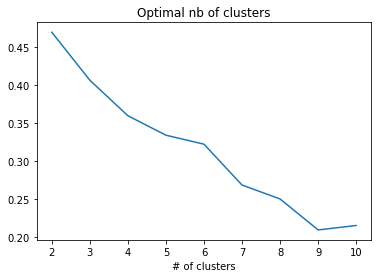

In [34]:
from sklearn import metrics

# Utilisation de la métrique "silhouette"
# Faire varier le nombre de clusters de 2 à 10
scores = []
for k in range(2, 11):
    km = cluster.KMeans(n_clusters = k, random_state = 42)
    km.fit(df_minmax)
    score = metrics.silhouette_score(df_minmax, km.labels_)
    scores.append(score)
    print(f'*** For n_clusters={k}, The Silhouette Coefficient is {score} ***\n')

print(scores)
# S :
# [0.46125628440580635, 0.40294238189905895, 0.41627447069733386, 0.3900272705972848, 0.3228464903008829, 0.3473776041463943, 0.3412276622157032, 0.25028718369271796, 0.22147311807421863]

# Graphique
plt.figure()
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(range(2, 11, 1), scores)
plt.title("Optimal nb of clusters")

In [1]:
import sklearn
sklearn.__version__

'0.24.2'

In [3]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [12]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [16]:
cl0 = kmeans.labels_
cl0

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 2])